In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read country vaccinations CSV into a dataframe. Drop null values.
# Isolate the ISO Code, Date, and Daily Vaccinations, then display the first five rows of data.
vacc_df = pd.read_csv('Resources/country_vaccinations.csv').dropna(how='all')
vacc_df = vacc_df[['iso_code', 'date', 'daily_vaccinations']].dropna()
vacc_df.head()

,iso_code,date,daily_vaccinations
1,AFG,2021-02-23,1367.0
2,AFG,2021-02-24,1367.0
3,AFG,2021-02-25,1367.0
4,AFG,2021-02-26,1367.0
5,AFG,2021-02-27,1367.0


In [3]:
# Read covid data CSV into a dataframe, drop null values.
covid_data = pd.read_csv('Resources/owid-covid-data.csv').dropna(how='all')
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Join the two dataframes above using a left join, on ISO code and date.
# Then display the columns ISO code, date, new deaths, and daily vaccinations.
join_df = pd.merge(
    left=covid_data,
    right=vacc_df,
    left_on=['iso_code', 'date'],
    right_on=['iso_code','date'],
    how='left'
)
join_df = join_df[['iso_code','date','new_deaths','daily_vaccinations']]
join_df.tail()

,iso_code,date,new_deaths,daily_vaccinations
166321,ZWE,2022-03-01,0.0,9291.0
166322,ZWE,2022-03-02,1.0,9061.0
166323,ZWE,2022-03-03,0.0,8903.0
166324,ZWE,2022-03-04,1.0,8603.0
166325,ZWE,2022-03-05,0.0,8458.0


In [5]:
# Isolate India, Indonesia, Germany, and USA into separate frames.
# Drop the ISO code since the dataframes are filtered by each country's ISO code.
india_df = join_df[join_df['iso_code'] == 'IND'].set_index('date').drop('iso_code', axis=1)
indonesia_df = join_df[join_df['iso_code'] == 'IDN'].set_index('date').drop('iso_code', axis=1)
germany_df = join_df[join_df['iso_code'] == 'DEU'].set_index('date').drop('iso_code', axis=1)
usa_df = join_df[join_df['iso_code'] == 'USA'].set_index('date').drop('iso_code', axis=1)
usa_df

,new_deaths,daily_vaccinations
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,NaN,NaN
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
...,...,...
2022-03-01,1691.0,277835.0
2022-03-02,2095.0,265808.0
2022-03-03,1743.0,255276.0


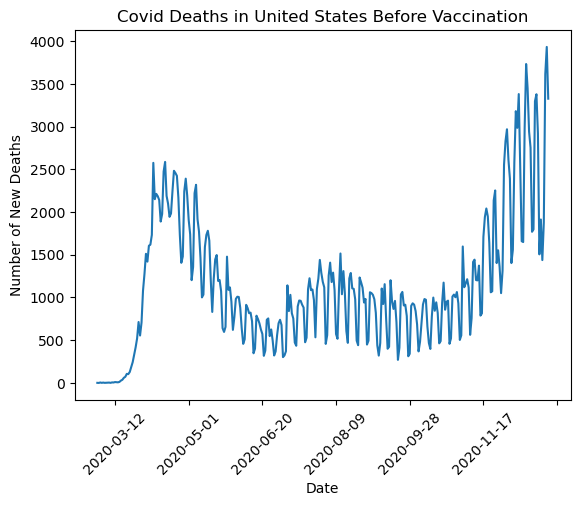

In [6]:
# Create Before and After Vaccination variables for USA and then plot the differences.
# For the sake of this dataset, Before the vaccine has a timeframe of 2020-12-31 and before.
# Number of new deaths are generally increasing before vaccination in United States.
usa_before_vacc = usa_df[:'2020-12-31']
usa_before_graph = usa_before_vacc[['new_deaths']].plot(
    title='Covid Deaths in United States Before Vaccination',
    legend=False
)
usa_before_graph.set_xlabel('Date')
usa_before_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()


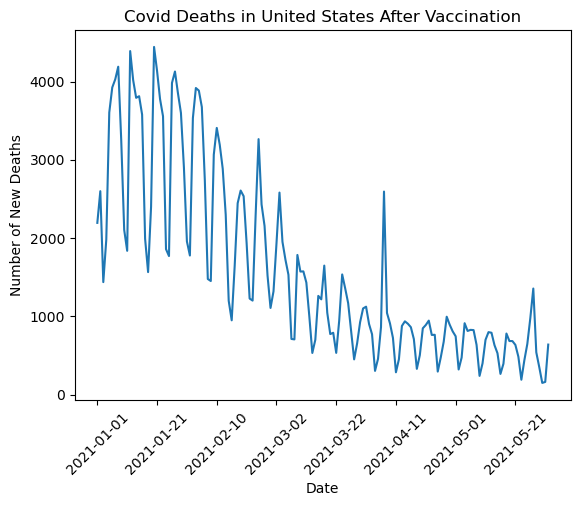

In [7]:
# After the vaccine has a timeframe of 2021-01-01 to 2021-06-01.
# Number of new deaths are generally decreasing after vaccination.
usa_after_vacc = usa_df['2021-01-01':'2021-06-01']
usa_after_graph = usa_after_vacc[['new_deaths']].plot(
    title='Covid Deaths in United States After Vaccination',
    legend=False
)
usa_after_graph.set_xlabel('Date')
usa_after_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

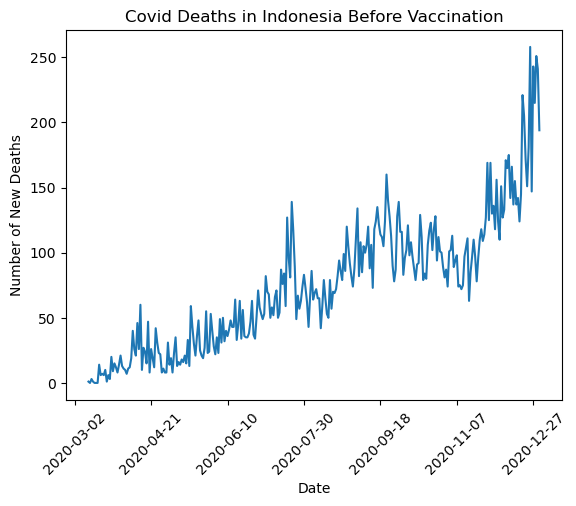

In [8]:
# Create Before and After Vaccination variables for Indonesia and then plot the differences.
# For the sake of this dataset, Before the vaccine has a timeframe of 2020-12-31 and before.
# Number of new deaths are increasing before vaccination in Indonesia.
indonesia_before_vacc = indonesia_df[:'2020-12-31']
indonesia_before_graph = indonesia_before_vacc[['new_deaths']].plot(
    title='Covid Deaths in Indonesia Before Vaccination',
    legend=False
)
indonesia_before_graph.set_xlabel('Date')
indonesia_before_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

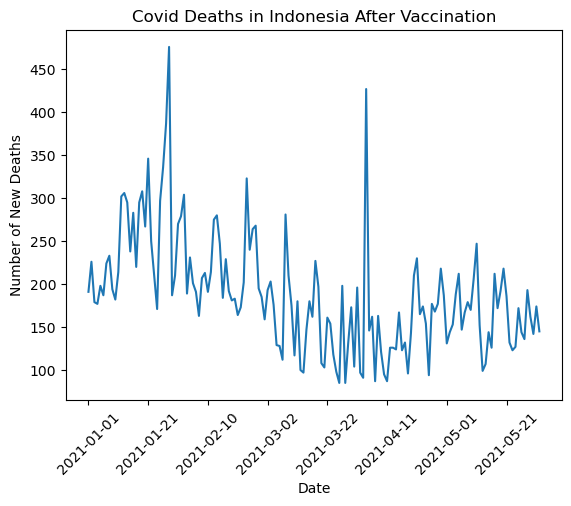

In [9]:
# After the vaccine has a timeframe of 2021-01-01 to 2021-06-01.
# Number of new deaths are slightly decreasing after vaccination.
indonesia_after_vacc = indonesia_df['2021-01-01':'2021-06-01']
indonesia_after_graph = indonesia_after_vacc[['new_deaths']].plot(
    title='Covid Deaths in Indonesia After Vaccination',
    legend=False
)
indonesia_after_graph.set_xlabel('Date')
indonesia_after_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

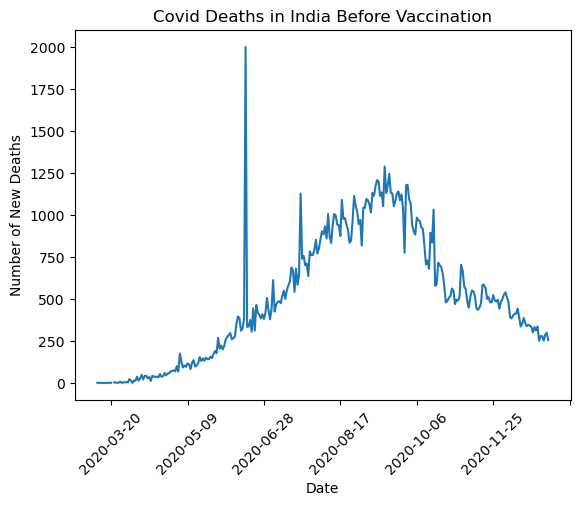

In [10]:
# Create Before and After Vaccination variables for India and then plot the differences.
# For the sake of this dataset, Before the vaccine has a timeframe of 2020-12-31 and before.
# Number of new deaths are increasing until mid-2020 and decreasing after.
india_before_vacc = india_df[:'2020-12-31']
india_before_graph = india_before_vacc[['new_deaths']].plot(
    title='Covid Deaths in India Before Vaccination',
    legend=False
)
india_before_graph.set_xlabel('Date')
india_before_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

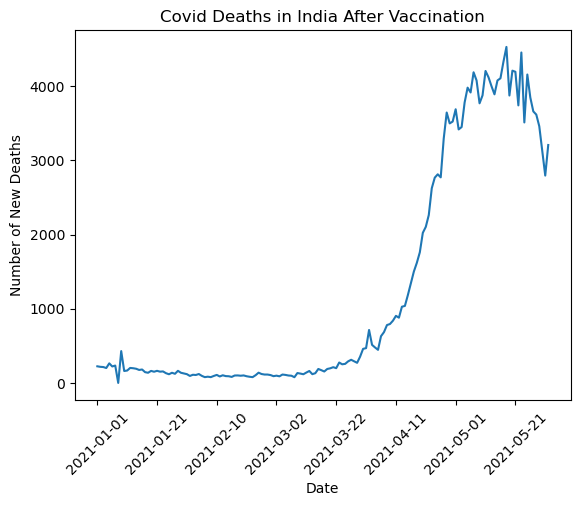

In [11]:
# After the vaccine has a timeframe of 2021-01-01 to 2021-06-01.
# Unlike other countries, number of new deaths increased dramatically in India.
india_after_vacc = india_df['2021-01-01':'2021-06-01']
india_after_graph = india_after_vacc[['new_deaths']].plot(
    title='Covid Deaths in India After Vaccination',
    legend=False
)
india_after_graph.set_xlabel('Date')
india_after_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

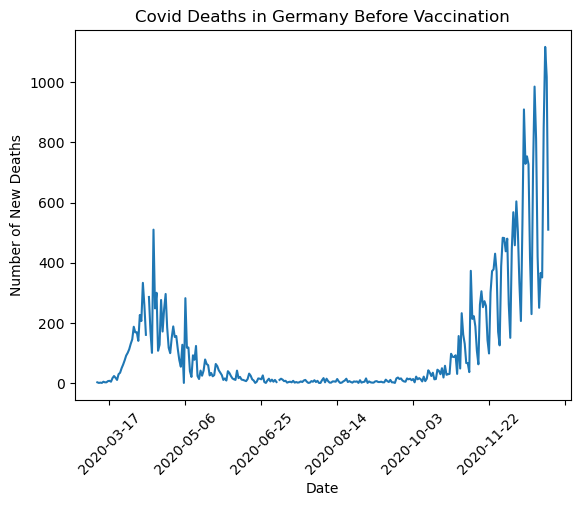

In [12]:
# Create Before and After Vaccination variables for Germany and then plot the differences.
# For the sake of this dataset, Before the vaccine has a timeframe of 2020-12-31 and before.
# Number of new deaths increased dramatically at the end of 2020 in Germany.
germany_before_vacc = germany_df[:'2020-12-31']
germany_before_graph = germany_before_vacc[['new_deaths']].plot(
    title='Covid Deaths in Germany Before Vaccination',
    legend=False
)
germany_before_graph.set_xlabel('Date')
germany_before_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

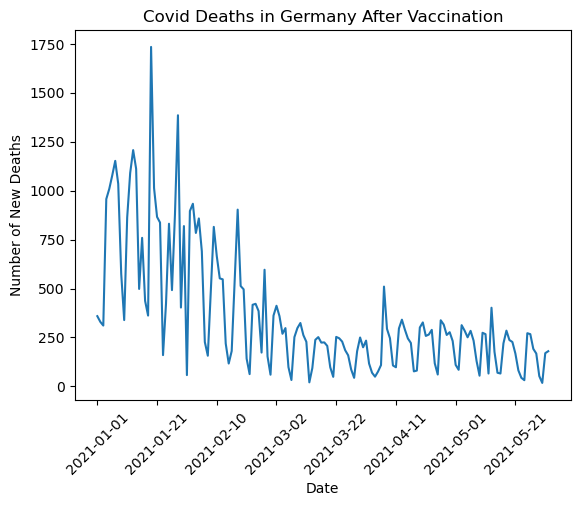

In [13]:
# After the vaccine has a timeframe of 2021-01-01 to 2021-06-01.
# Number of new deaths are generally decreasing after vaccination.
germany_after_vacc = germany_df['2021-01-01':'2021-06-01']
germany_after_graph = germany_after_vacc[['new_deaths']].plot(
    title='Covid Deaths in Germany After Vaccination',
    legend=False
)
germany_after_graph.set_xlabel('Date')
germany_after_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Run a correlation between new deaths and daily vaccinations for Germany.
# Germany shows a negative correlation between number of new deaths and vaccinations.
germany_after_vacc.corr()

,new_deaths,daily_vaccinations
new_deaths,1.000000,-0.523404
daily_vaccinations,-0.523404,1.000000


In [15]:
# Run a correlation between new deaths and daily vaccinations for USA.
# USA shows a negative correlation between number of new deaths and vaccinations.
usa_after_vacc.corr()

,new_deaths,daily_vaccinations
new_deaths,1.000000,-0.583399
daily_vaccinations,-0.583399,1.000000


In [16]:
# Run a correlation between new deaths and daily vaccinations for India.
# Unlike other countries, India shows a positive correlation between number of new deaths and vaccinations.
india_after_vacc.corr()

,new_deaths,daily_vaccinations
new_deaths,1.000000,0.432523
daily_vaccinations,0.432523,1.000000


In [17]:
# Run a correlation between new deaths and daily vaccinations for Indonesia.
# Indonesia shows a negative correlation between number of new deaths and vaccinations.
indonesia_after_vacc.corr()

,new_deaths,daily_vaccinations
new_deaths,1.000000,-0.594391
daily_vaccinations,-0.594391,1.000000


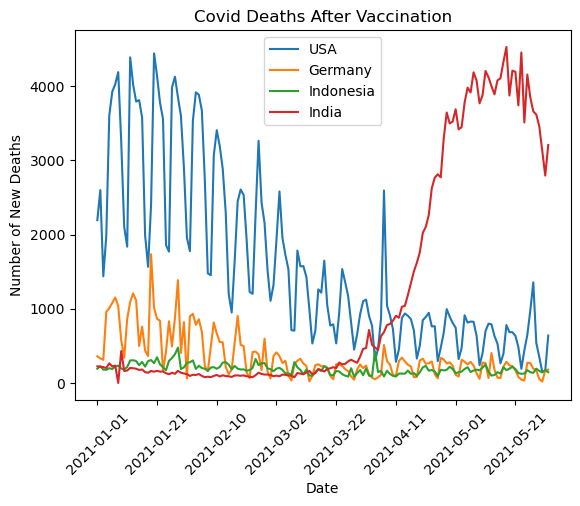

In [18]:
# Plot the deaths after vaccination data per country.
deaths_after_vacc = pd.DataFrame({
    'USA': usa_after_vacc['new_deaths'],
    'Germany': germany_after_vacc['new_deaths'],
    'Indonesia': indonesia_after_vacc['new_deaths'],
    'India': india_after_vacc['new_deaths'],
})

dav_graph = deaths_after_vacc.plot(
    title='Covid Deaths After Vaccination',
)
dav_graph.set_xlabel('Date')
dav_graph.set_ylabel('Number of New Deaths')
plt.xticks(rotation=45)
plt.show()

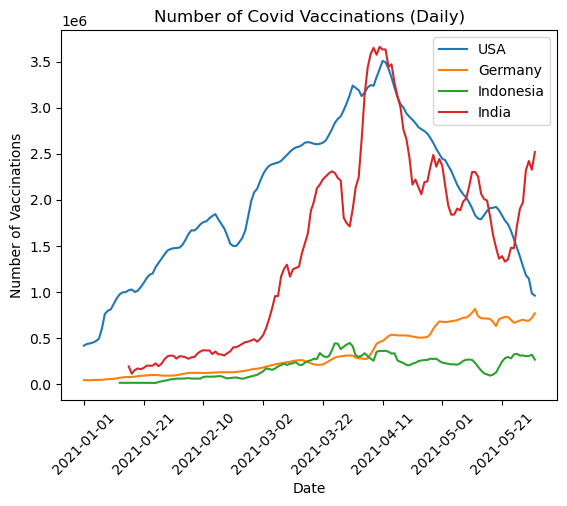

In [19]:
# Plot the daily vaccinations data per country.
vacc_combined = pd.DataFrame({
    'USA': usa_after_vacc['daily_vaccinations'],
    'Germany': germany_after_vacc['daily_vaccinations'],
    'Indonesia': indonesia_after_vacc['daily_vaccinations'],
    'India': india_after_vacc['daily_vaccinations'],
})

vacc_graph = vacc_combined.plot(
    title='Number of Covid Vaccinations (Daily)'
)
vacc_graph.set_xlabel('Date')
vacc_graph.set_ylabel('Number of Vaccinations')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Summarize your findings for USA, showing the standard deviation, mean, min, and max for new deaths and daily vaccinations.
# Among the selected countries, USA has the highest average number of new deaths.
usa_df.describe()

,new_deaths,daily_vaccinations
count,736.000000,4.470000e+02
mean,1302.224185,1.244055e+06
std,986.504969,7.901743e+05
min,0.000000,4.579000e+03
25%,526.750000,6.785580e+05
50%,1031.000000,9.982940e+05
75%,1899.500000,1.633442e+06
max,4442.000000,3.506960e+06


In [21]:
# Summarize your findings for Germany, showing the standard deviation, mean, min, and max for new deaths and daily vaccinations.
# Among the selected countries, Germany has the lowest average number of new deaths.
germany_df.describe()

,new_deaths,daily_vaccinations
count,723.000000,4.330000e+02
mean,171.821577,3.934140e+05
std,231.901313,2.726814e+05
min,0.000000,1.810100e+04
25%,17.000000,1.557220e+05
50%,77.000000,3.018180e+05
75%,246.000000,6.294490e+05
max,1734.000000,1.132105e+06


In [22]:
# Summarize your findings for India, showing the standard deviation, mean, min, and max for new deaths and daily vaccinations.
# Among the selected countries, India had the highest number of deaths in a day.
india_df.describe()

,new_deaths,daily_vaccinations
count,723.000000,4.140000e+02
mean,702.161826,4.299352e+06
std,898.026861,2.501809e+06
min,0.000000,1.121500e+05
25%,209.000000,2.225265e+06
50%,425.000000,4.408626e+06
75%,798.500000,6.239302e+06
max,4529.000000,1.003800e+07


In [23]:
# Summarize your findings for Indonesia, showing the standard deviation, mean, min, and max for new deaths and daily vaccinations.
indonesia_df.describe()

,new_deaths,daily_vaccinations
count,725.000000,4.170000e+02
mean,206.783448,8.350625e+05
std,345.274374,5.510693e+05
min,0.000000,1.182300e+04
25%,34.000000,2.722450e+05
50%,102.000000,8.986380e+05
75%,191.000000,1.314110e+06
max,2069.000000,1.897011e+06
